# "Understanding Code for Lesson 1 of fast.ai"
> "This Post is about the challenges i faced the in understanding some line of code for Lesson 1 and sharing the documentation for the same. "

- toc: true
- badges: true
- comments: true
- categories: [fastpages, fastai, jupyter]
- comments: true
- image: images/some_folder/your_image.png


Hello, Everyone.

My name is Vikas Awasthi. I am taking Fastai course and completed my 'Leasson 1' yesturday. I want to share this post because i faced some challenges in understanding the coding of Lesson 1. I don't have much of experience in coding. But after some serach on google, i came very close to understang the course. So, may be, for those who are just like me, this post can be helpful.

In [6]:
# First line of code
!pip install -Uqq fastai duckduckgo_search

# What is "-Uqq" ?



Above line of code i understand, which is basically installing the packages.
but i did not get what "-Uqq" does So, i searched and found this post in Fastai forum.
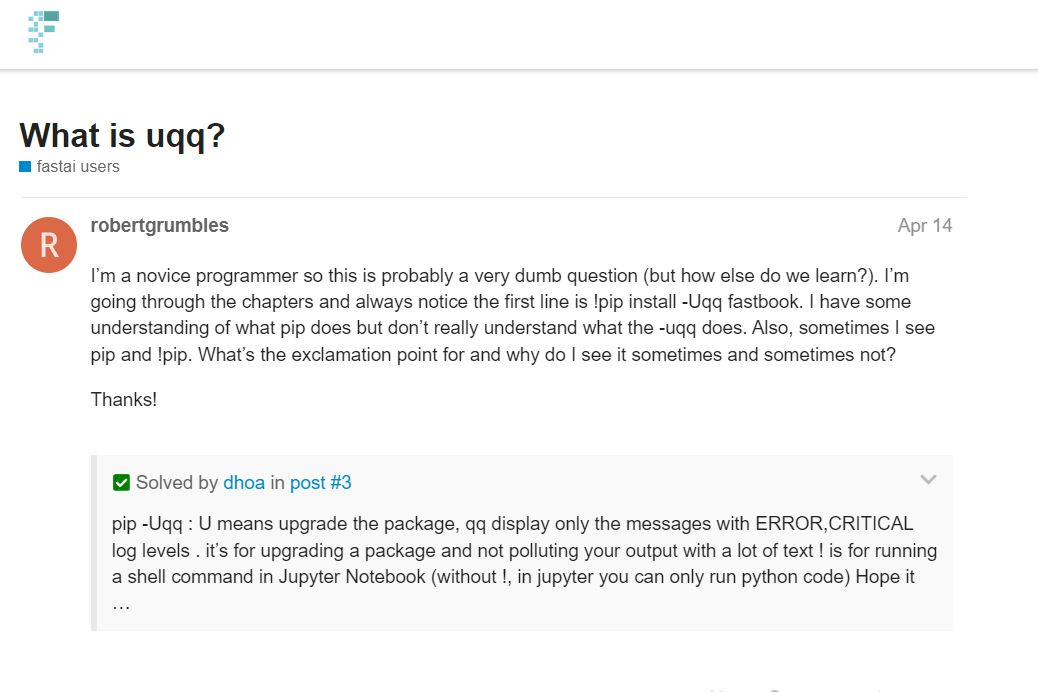

The Link for the post-
https://forums.fast.ai/t/what-is-uqq/95324


#What is duckduckgo_search?

In [37]:
from duckduckgo_search import ddg_images

In the above line of code, We are importing a function from duckduckgo_search module. I did not know what this library used for? so, i searched about it found the documentation. The link for the documentation-
https://pypi.org/project/duckduckgo-search/

Actually, what this function "ddg_image" does, is if provide a keyword to this function and then it will return link related to that keyword 
for example: if we give keyword "tree" so it will return link which contain the image of "tree' 

In [7]:

keywords = 'liberty tree'
r = ddg_images(keywords,  max_results=1)
print(r)


[{'title': 'Liberty Tree | Architect of the Capitol | United States Capitol', 'image': 'https://www.aoc.gov/sites/default/files/460413.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.MMKkvSDLrzofbXA1MK1RrgHaLI&pid=Api', 'url': 'http://aoc.gov/trees/liberty-tree', 'height': 1500, 'width': 998, 'source': 'Bing'}]


If you click the link this link, you will find tree.
"max_result" is number of results you want.

In [12]:
from fastcore.all import *

Now, above line of code will import all the function of fastcore module. Now will define a function for image search.

In [23]:
def search_images(term, max_images= 30):
  print(f"Searcing for '{term}'")
  return L(ddg_images(term, max_results=max_images)).itemgot("image")

In above function 'term' is the keyword which we want to search and 'max_images'
is the number of result which we want to see.
So, this function will return the result the list containg all the links.

This function returning 'L', which work as list in fascore module.

# What is "L" in search_images function? 
L works exactly as list.

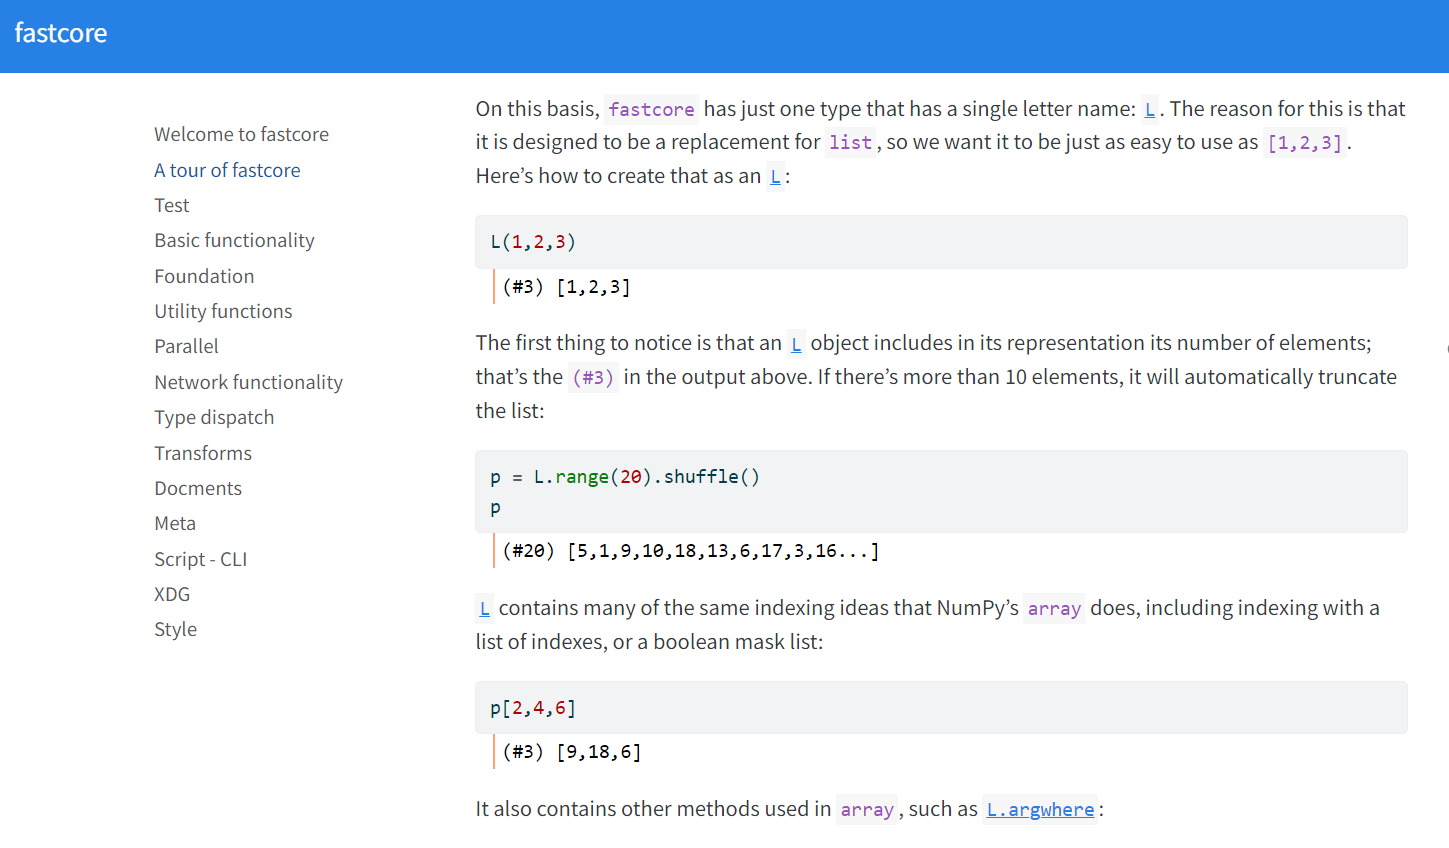

The link for the documentation of fastcore-
https://fastcore.fast.ai/000_tour.html

In [24]:
urls = search_images("Blue Whale", max_images = 50)
urls[0]

Searcing for 'Blue Whale'


'https://idsb.tmgrup.com.tr/ly/uploads/images/2021/04/28/111577.jpeg'

in the above lines of code we are using our search_images function and showing only one link out of 50.

Let's download image of that url.

In [15]:
from fastdownload import download_url

# What is 'download_url'?

'dowload_url' is used to download the data on the link provided. 

In [25]:
dest = 'blue_whale.jpg'
download_url(urls[0], dest)

Path('blue_whale.jpg')

The above line of code has downloaded the image with the name "blue_whale.jpg". now i can see the image in my files.
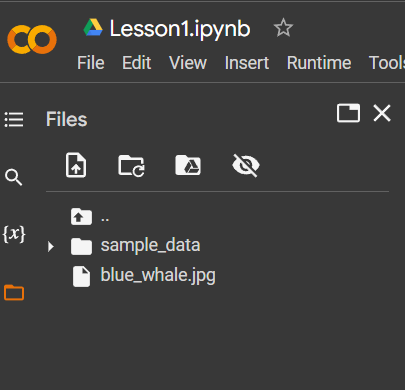


Now, let's open the image.

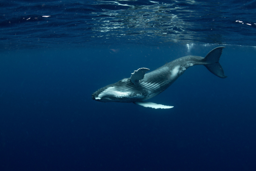

In [26]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

In the above line of code "Image.open("image.jpg") is used to open the downloaded image and than that image is converted to thumbnail of size(256, 256). Now will repeat the process for "Shark" image

Searcing for 'Shark'


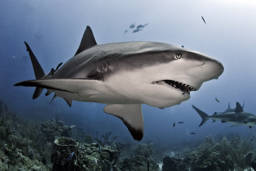

In [27]:
download_url(search_images('Shark', max_images=1)[0], 'shark.jpg', show_progress=False)
Image.open('shark.jpg').to_thumb(256,256)

Now, we will repeat the process for downloading many images of "SharK" and "Blue whale" with help of "for" loop.

In [31]:
searches = "Shark", "Blue Whale"
path = Path("blue_whale_or_not")

from time import sleep
for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f"{o} under water day photo"))
  sleep(10)
  download_images(dest, urls=search_images(f"{o} under water night photo"))
  sleep(10)
  download_images(dest, urls=search_images(f"{o} above water photo"))
  sleep(10)
  resize_image(path/o, max_size=400, dest=path/o)


Searcing for 'Shark under water day photo'
Searcing for 'Shark under water night photo'
Searcing for 'Shark above water photo'
Searcing for 'Blue Whale under water day photo'
Searcing for 'Blue Whale under water night photo'
Searcing for 'Blue Whale above water photo'



# download_image

From 'fastai.vision" we are using 'download_images' function which will download images into destination path.

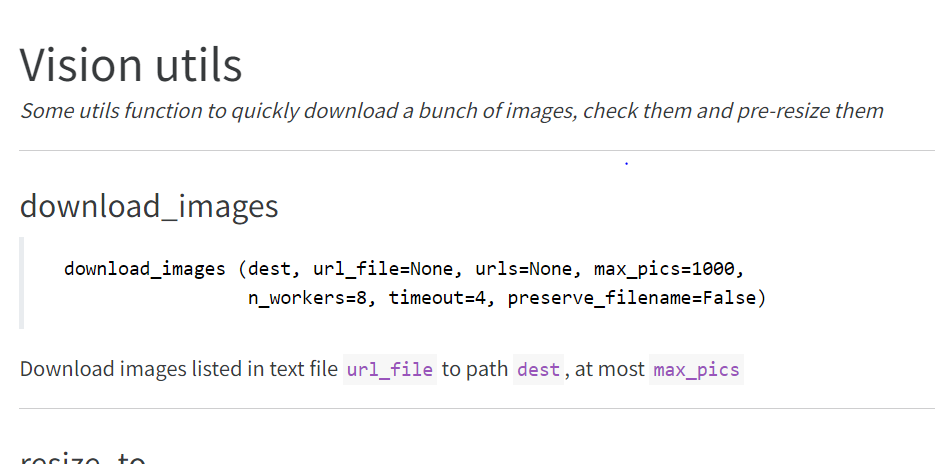

The link for the documentation-
https://docs.fast.ai/vision.utils.html



In [32]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

# varify_images
This function varify each images whether it is opening or not if it does not, it delete that file with ".unlink" method.

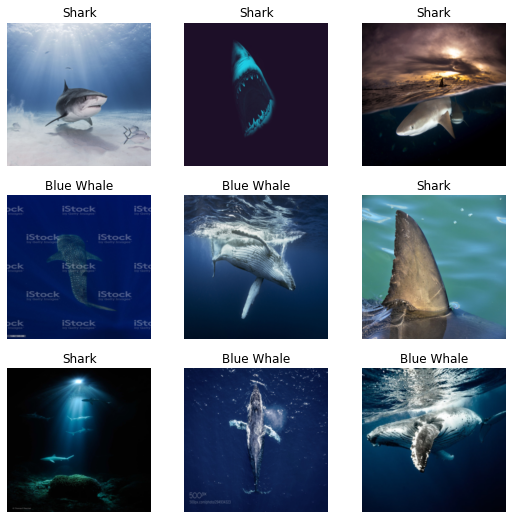

In [34]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

Above code is already explained in the Lesson 1 notebook

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

In [35]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.299414,1.571170,0.424242,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.834886,0.747714,0.303030,00:55
1,0.559681,0.533965,0.121212,00:54
2,0.395499,0.503050,0.151515,00:53


#vision_learner

vision_learner helps to define our learner, the arguments given are "datablock" and computer vision model "resnet18" and metrics for error.

fine_tune() method which automatically uses best practices for fine tuning a pre-trained model.

As per Sir Jeremy Howard-
""Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the pretrained model), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in imagenet, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the free fast.ai course."

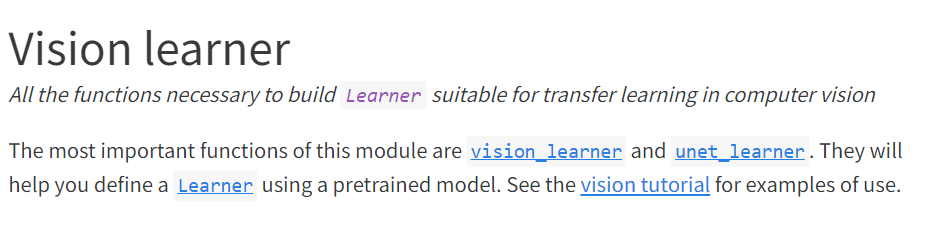

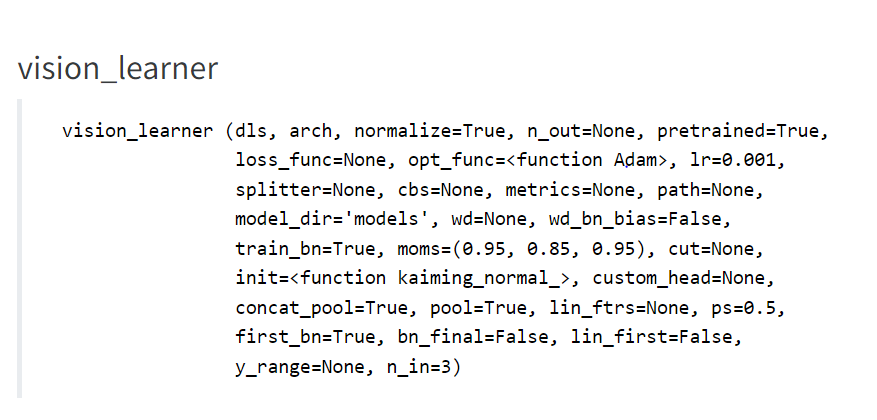

The link for the documentation-
https://docs.fast.ai/vision.learner.html#vision_learner


Now ! our model is ready. Let's see the mopdel prediction.

In [36]:
is_blue_whale,_,probs = learn.predict(PILImage.create('blue_whale.jpg'))
print(f"This is an {is_blue_whale}")
print(f"Probability it's an Blue Whale: {probs[0]:.4f}")

This is an Blue Whale
Probability it's an Blue Whale: 0.9964


Good job, resnet18. 😀

Thank you for watching the post, i hope it is helpful to you.